In [5]:
import pandas as pd
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [6]:
degenerate_symbols = {
    'A' : ['A'],
    'C' : ['C'],
    'G' : ['G'],
    'T' : ['T'],
#    'U' : ['U'],
    'W' : ['A', 'T'],
    'S' : ['C', 'G'],
    'M' : ['A', 'C'],
    'K' : ['G', 'T'],
    'R' : ['A', 'G'],
    'Y' : ['C', 'T'],
    'B' : ['C', 'G', 'T'],
    'D' : ['A', 'G', 'T'],
    'H' : ['A', 'C', 'T'],
    'V' : ['A', 'C', 'G'],
    'N' : ['A', 'C', 'G', 'T'],
    'Z' : [],
}

aurora_secstruct_positions_0 = [3,5,10,11,13,14,15,16,21,22,25,26,27,28,29,33,36,39,41,42,43,44,45,46]
aurora2 = 'GGAAGGGATGACTATGTCCGGTTCCTGTAAGGCATGTGGAGTGTTGT'
aurora2_nonconstant = ''.join([aurora2[x] for x in aurora_secstruct_positions_0])

lib_design = [
    'GRRARYRYKHRKWWYDHRYRYATY',
    'ARRARYRYKHRKWWYDHRYRYTTY',
    'GRRCRYRYKHRKWWYDHRYRYAGY',
    'GRRARYRYKHYKWWRDHRYRYATY',
    'ARRCRYRYKHRKWWYDHRYRYTGY',
    'ARRARYRYKHYKWWRDHRYRYTTY',
    'GRRCRYRYKHYKWWRDHRYRYAGY',
    'ARRCRYRYKHYKWWRDHRYRYTGY'
]

In [7]:
single_positions = [(1,), (8,), (9,), (11,), (12,), (13,), (15,), (16,)]

paired_positions = [(2, 23), (4, 20), (5, 19), (6, 18), (7, 17)]

explicitly_paired_positions = {
    (0, 21) : [('G', 'A'), ('A', 'T')],
    (3, 22) : [('A', 'T'), ('C', 'G')],
    (10, 14) : [('A', 'C'), ('A', 'T'), ('G', 'C'), ('G', 'T'), ('C', 'A'), ('C', 'G'), ('T', 'A'), ('T', 'G')]
}

In [8]:
single_positions = {
    1 : 0.5,
    8 : 0.5,
    9 : 0.33,
    11 : 0.5,
    12 : 0.5,
    13 : 0.5,
    15 : 0.33,
    16 : 0.33 
}

paired_positions = {
    (2, 23) : [],
    (4, 20) : [],
    (5, 19) : [],
    (6, 18) : [],
    (7, 17) : []
}

explicitly_paired_positions = {
    (0, 21) : [],
    (3, 22) : [],
    (10, 14) : []
}


In [10]:
'RRRYRYKHRKWWYDHRYRYTY'

'RRRYRYKHRKWWYDHRYRYTY'

In [9]:
def seqDist(s1, s2):
    return sum([1 if b1 != b2 else 0 for b1, b2 in zip(s1, s2)])

In [25]:
def getBinomDistribution(trials, success_prob, r_values):
    rv = binom(trials, success_prob)
    dist = {x:rv.pmf(x) for x in r_values}
    return pd.Series(dist)

In [26]:
def getTheoreticalDist(mutRate, positions):
    """
    Returns a theoretical distribution (binomial distribution) of the number of sequences at various distances from a reference sequence
    
    mutRate:     The probability of a mutation occuring.
    positions:   Number of positions (sequence length)
    """
    
    dist = []
    for p in range(0, positions):
        prob_term = (mutRate ** p) * ((1 - mutRate) ** (positions - p))
        comb_term = (math.factorial(positions)) / (math.factorial(positions-p) * math.factorial(p))
        dist.append(prob_term * comb_term)
    return dist

In [27]:
def getTheoreticalDist(mutRate, positions):
    """
    Returns a theoretical distribution (binomial distribution) of the number of sequences at various distances from a reference sequence
    
    mutRate:     The probability of a mutation occuring.
    positions:   Number of positions (sequence length)
    """
    
    dist = []
    for p in range(0, positions):
        
        prob_term_single = (mutRate ** p) * ((1 - mutRate) ** (positions - p))
        prob_term_paired = (mutRate ** p) * ((1 - mutRate) ** (positions - p))
        prob_term_exp_paired = (mutRate ** p) * ((1 - mutRate) ** (positions - p))
        
        comb_term_single = (math.factorial(positions)) / (math.factorial(positions-p) * math.factorial(p))
        comb_term_paired = (math.factorial(positions)) / (math.factorial(positions-p) * math.factorial(p))
        comb_term_exp_paired = (math.factorial(positions)) / (math.factorial(positions-p) * math.factorial(p))
        
        dist.append(prob_term * comb_term)
    
    return dist

In [28]:
xs = generateSeqSet(lib_design, 100000)

In [29]:
ds = [seqDist(s, aurora2_nonconstant) for s in xs]

In [31]:
df_secstruct_generated = pd.DataFrame({'seq':xs, 'dist':ds})

In [36]:
vc_dists = df_secstruct_generated.value_counts('dist', normalize=True)

<BarContainer object of 24 artists>

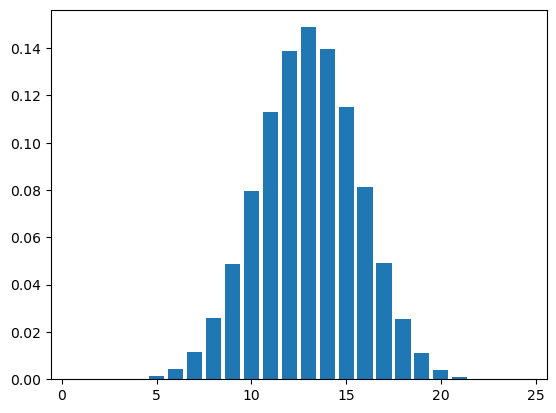

In [37]:
plt.bar(vc_dists.index, vc_dists.values)

In [ ]:
exp_distribution_rn = pd.Series(getTheoreticalDist(0.03, 85)).sort_index()
exp_distribution_ss = pd.Series(getTheoreticalDist(0.03, 85)).sort_index()

In [ ]:
exp_distribution

In [ ]:
plt.bar(exp_distribution.index, exp_distribution.values)

In [ ]:
aurora_secstruct_design_1 = [(1, 'G'),(2, 'G'),(3, 'A'),(4, 'N'),(5, 'G'),(6, 'R'),(7, 'G'),(8, 'A'),(9, 'T'),(10, 'G'),(43, 'R'),(44, 'N'),(45, 'T'),(46, 'R'),(47, 'Y'),(48, 'R'),(49, 'Y'),(50, 'C'),(51, 'C'),(52, 'G'),(53, 'G'),(54, 'K'),(55, 'H'),(56, 'C'),(57, 'C'),(58, 'N'),(59, 'K'),(60, 'W'),(61, 'W'),(62, 'N'),(63, 'G'),(64, 'G'),(65, 'C'),(66, 'D'),(67, 'T'),(68, 'G'),(69, 'H'),(70, 'G'),(71, 'G'),(72, 'R'),(73, 'G'),(74, 'Y'),(75, 'R'),(76, 'Y'),(77, 'N'),(78, 'N'),(79, 'Y')]
aurora_paired_positions_1 = [(4, 45), (11, 47), (12, 46), (14, 44), (15, 43), (16, 42), (17, 40), (26, 30)]